In [1]:
%matplotlib inline
import d2l
from mxnet import np, npx
import random
npx.set_np()

After loading in the libraries, we would like to be able to cast the die. In statistics we call this process of drawing examples from probability distributions *sampling*. The distribution that assigns probabilities to a number of discrete choices is called the *multinomial distribution*.

In [2]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 1, 0, 0], dtype=int64)

As with estimating the fairness of a die, we often want to generate many samples from the same distribution. It would be unbearably slow to do this with a Python for loop, so `random.multinomial` supports drawing multiple samples at once, returning an array of independent samples in any shape we might desire.

We can also conduct, say 3, groups of experiments, where each group draws 10 samples, all at once.

In [3]:
counts = np.random.multinomial(10, fair_probs, size = 3)
counts

array([[1, 1, 5, 1, 1, 1],
       [1, 0, 1, 3, 3, 2],
       [3, 4, 1, 0, 2, 0]], dtype=int64)

Now that we know how to sample rolls of a die, we can simulate 1000 rolls. We can then go through and count, after each of the 1000 rolls, how many times each number was rolled. Specifically, we calculate the **relative frequency** as the estimate of the true probability.

In [4]:
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000 # Relative frequency as the estimate

array([0.162, 0.15 , 0.179, 0.169, 0.163, 0.177])

Because we generated the data from a fair die, we know that each outcome has **true probability** $\frac{1}{6}$, roughly 0.167, so the above output estimates look good.

We can also visualize how these probabilities converge over time towards the true probability. Let's conduct 500 groups of experiments where each group draws 10 samples.

In [5]:
counts = np.random.multinomial(10, fair_probs, 500)
cum_counts = counts.astype(np.float32).cumsum(axis = 0)
estimates = cum_counts / cum_counts.sum(axis = 1, keepdims = True)

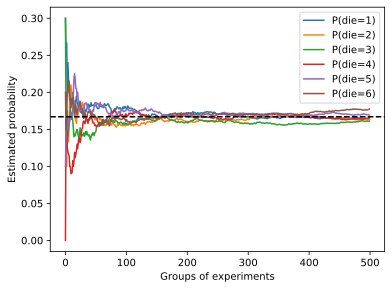

In [6]:
d2l.set_figsize((6, 4.5))

for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                label = ("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y = 0.167, color = 'black', linestyle = 'dashed')

d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

Each solid curve corresponds to one of the six values of the die and gives our estimated probability that the die turns up that value as assessed after each group of experiments. The dashed black line gives the true underlying probability. As we get more data by conducting more experiments, the 6 solid curves converge towards the true probability.

In [7]:
0.01 + 0.0015

0.0115

In [10]:
1 - 0.0015

0.9985

In [11]:
0.9985 * 0.01

0.009985

In [12]:
0.009985 + 0.0015

0.011485

In [13]:
(1 * 0.0015) / 0.011485

0.13060513713539398

In [15]:
0.01 * 0.9985

0.009985

In [18]:
0.00029955 + 0.98 * 0.0015

0.00176955

In [19]:
0.98 * 0.0015

0.00147

In [21]:
(0.98 * 0.0015) / 0.00176955

0.8307196744935152

In [24]:
np.random.randint(1,6)

array(3, dtype=int64)

In [105]:
class Dice:
    def __init__(self):
        self.sides = 6
        self._results = [] 
        
    def throws(self, n_throws):
        throw = np.random.randint(1, self.sides, size = n_throws)
        self._results.append(throw)
        print(f'Results after {n_throws} throws: {throw}')
    
    def print_results(self):
        return self._results

In [106]:
import seaborn as sns

In [107]:
die1 = Dice()

In [108]:
die1.throws(100000)

Results after 100000 throws: [4 3 2 ... 3 4 3]


In [122]:
results = []
for i in die1.print_results():
    results.append(i)